#### Scientific Programming with Python
## Yang Exponential Equation

Nowadays in natural sciences, it is conventional for real systems to be "[...] represented by models formalized as sets of equations, which describes the system behavior to a varying degree of accuracy." These systems are also known as *simulations*. [1] The simplest classical-physics model for this purpose is the Lennard-Jones potential equation [2], which describes the potential energy of interaction between two non-bonding particles based on their distance of separation and is defined as followed:

$$\Large V_{LJ}(r) = 4\epsilon \displaystyle \left[\left(\frac{\sigma}{r}\right)^{12} - \left(\frac{\sigma}{r}\right)^{6}\right] \tag{1}$$

Lately, a solid model, derived by Yang et al., is an exponential equation [3] defined as followed:

$$\Large V_{Exp}(r) = \epsilon \displaystyle \left[e^{\alpha \left(1 - \frac{r}{\sigma}\right)} - \left(\left(\frac{r}{\sigma}\right)^{4} - 2 \left(\frac{r}{\sigma}\right)^{2} + 3\right)e^{\left(\frac{\alpha}{2}\right)\left(1 - \frac{r}{\sigma}\right)}\right] \tag{2}$$

In both equations
- $\Large V$ stands for the intermolecular potential between two particles given in $eV$
- $\Large \epsilon$ stands for a measure of the depth of force of attraction between two particles given in $eV$
- $\Large \sigma$ stands for the distance at which the intermolecular potential between two particles equals zero, meaning it gives a measurement of how close two non-bonding particles can get before the force of repulsion is greater than the force of attraction, resulting in the particles repelling each other, given in $Ångstrom$; it is also referred to as van-der-Waals radius and is equal to $\frac{1}{2}$ of the internuclear distance between non-bonding particles
- $\Large r$ stands for the distance of separation between both particles, measured from the center of one particle to another [3,4]

In equation $2$
- $\Large \alpha$ stands for a weighing factor, which controls the exponential terms' influences [3]

Additionally, supplementary information is provided for equation $2$, giving suggestions for the parameters used for $Ar_{2}$ shown in the following table:

|$Species$|$\epsilon (kJ/mol)$|$\sigma (Å)$|$\alpha$ |
|:---:|:---:|:---:|:---:|
|$Ar_{2}$| 1.178 | 3.75 | 13.18 |

In [1]:
import pandas as pd
import math

In [2]:
epsilon = 1.178 # in kJ/mol
sigma   = 3.75  # in Ångstrom
alpha   = 13.18

Using Cybulski and Toczyłowski's accurate quantum mechanics calculations as benchmark target data, which determines $V(r)$ in Hartree at different distances for $Ar_{2}$, we can compare both equations.

### Quantum Mechanics target data

First we need to import the benchmark target data we mentioned before. We do this by using the $pandas$ library and its built-in functions.

In [3]:
# read_csv() reads .csv file with semicolon as separator
data = pd.read_csv('CybulskiT1999_Ar2.csv', sep=';')

Now we need to clean the benchmark data by removing rows with duplicated and missing data.

In [4]:
# notnull() removes all rows with missing data (V(r) == None)
# drop_duplicates() removes all duplicated rows
data = data[data['V(r) (Hartree)'].notnull()].drop_duplicates(subset=['R (Å)'], keep='first')

After cleaning our benchmark data, we want to insert a column containing the converted values of $V(r)$ in $E_{h}$ to $kJ/mol$. [5]

In [5]:
def convert_hartree_to_kJ_mol(value):
    '''
    converts V(r) value's unit from Hartree to kJ/mol (E_h = 2625.4996394799 kJ/mol)
    :param value: float, value in Hartree
    :return:      float, value in kJ/mol
    '''
    return value * 2625.4996394799

In [6]:
data['V_CT(r) (kJ/mol)'] = [convert_hartree_to_kJ_mol(x) for x in data['V(r) (Hartree)']]

This gives us the following table.

In [7]:
data

,R (Å),V(r) (Hartree),V_CT(r) (kJ/mol)
0,3.000,0.003055,8.020849
1,3.250,0.000518,1.360298
2,3.500,-0.000279,-0.732462
5,3.750,-0.000441,-1.157373
6,3.775,-0.000442,-1.160130
7,3.800,-0.000441,-1.158686
8,3.850,-0.000436,-1.145269
10,4.000,-0.000400,-1.049150
11,4.250,-0.000313,-0.822096
12,4.500,-0.000232,-0.609904


### Computing values using both equations

Now we want to calculate $V_{r}$ for all distances $R$ available in our table using both the Lennard-Jones potential equation (1) and the Yang exponential equation (2). For both equations, we use the values mentioned in the introduction.

In [8]:
def lennard_jones(epsilon, sigma, distance):
    '''
    calculates V(r) using Lennard-Jones potential equation
    calculation is divided in two parts to avoid too long lines
    :param epsilon:  float, value in kJ/mol
    :param sigma:    float, value in Å
    :param distance: float, value in Å
    :return:         float, value in J
    '''
    part_1 = 4 * epsilon
    part_2 = pow((sigma / distance), 12) - pow((sigma / distance), 6)
    return part_1 * part_2

In [9]:
def yang_exp(alpha, epsilon, sigma, distance):
    '''
    calculates V(r) using Yang expontential equation
    calculation is divided in three parts to avoid too long lines
    :param alpha:    float, no units
    :param epsilon:  float, value in kJ/mol
    :param sigma:    float, value in Å
    :param distance: float, value in Å
    :return:         float, value in kJ/mol
    '''
    part_1 = math.exp(alpha * (1 - (distance / sigma)))
    part_2 = pow((sigma / distance), 4) - 2 * pow((distance / sigma), 2) + 3
    part_3 = math.exp((alpha / 2) * (1 - (distance / sigma)))
    return epsilon * (part_1 - part_2 * part_3)

In [10]:
data['V_LJ(r) (kJ/mol)'] = [lennard_jones(epsilon, sigma, x) for x in data['R (Å)']]

In [11]:
data['V_Exp(r) (kJ/mol)'] = [yang_exp(alpha, epsilon, sigma, x) for x in data['R (Å)']]

After adding our calculated values, our current dataframe should look like this.

In [12]:
data

,R (Å),V(r) (Hartree),V_CT(r) (kJ/mol),V_LJ(r) (kJ/mol),V_Exp(r) (kJ/mol)
0,3.000,0.003055,8.020849,50.593771,-1.872442
1,3.250,0.000518,1.360298,15.121296,-2.446589
2,3.500,-0.000279,-0.732462,3.655327,-1.871585
5,3.750,-0.000441,-1.157373,0.000000,-1.178000
6,3.775,-0.000442,-1.160130,-0.176962,-1.116092
7,3.800,-0.000441,-1.158686,-0.332475,-1.056066
8,3.850,-0.000436,-1.145269,-0.587738,-0.941862
10,4.000,-0.000400,-1.049150,-1.027134,-0.647167
11,4.250,-0.000313,-0.822096,-1.174281,-0.304279
12,4.500,-0.000232,-0.609904,-1.049557,-0.105499


### Plotting data

To visualise our calculated data, we can plot our dataframe using different line colours.

<AxesSubplot: xlabel='R (Å)', ylabel='V(r) (kJ/mol)'>

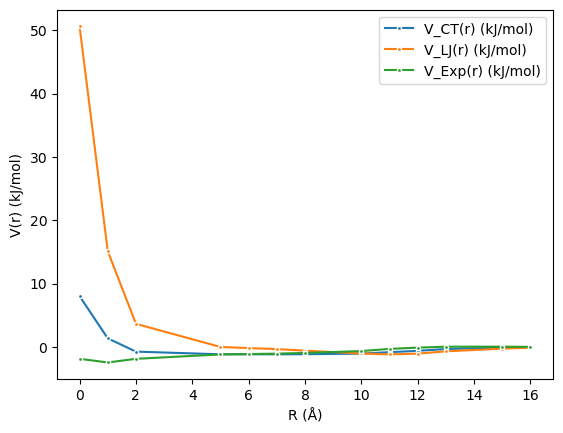

In [13]:
data.iloc[:,[2, 3, 4]].plot(xlabel='R (Å)', ylabel='V(r) (kJ/mol)', marker='.', markeredgecolor='white')

### Saving data to a CSV-formatted file

Lastly, we want to save our newly calculated data into a CSV-formatted file for further use.

In [14]:
data.to_csv('CybulskiT1999_Ar2_new.csv', sep=';')

### References

[1] I. NEZBEDA, J. JIRSÁK, F. MOUČKA: **Molecular modeling and simulations** in *Electrospun Nanofibers* (2017), 255.

[2] WIKIPEDIA CONTRIBUTORS: **Lenard-Jones potential**, Wikimedia Foundation, Last modified on August 30th, 2023. https://en.wikipedia.org/wiki/Lennard-Jones_potential, Accessed on November 20th, 2023.

[3] L. YANG, L. SUN, W.-Q. DENG: **van der Waals Function for Molecular Mechanics** in J. Phys. Chem. A (2020), 124, 2102-2107.

[4] CHEMISTRY LIBRETEXTS: **Lennard-Jones Potential**, https://chem.libretexts.org/Bookshelves/Physical_and_Theoretical_Chemistry_Textbook_Maps/Supplemental_Modules_(Physical_and_Theoretical_Chemistry)/Physical_Properties_of_Matter/Atomic_and_Molecular_Properties/Intermolecular_Forces/Specific_Interactions/Lennard-Jones_Potential, Accessed on November 20th, 2023.

[5] WIKIPEDIA CONTRIBUTORS: **Hartree**, Wikimedia Foundation, Last modified on July 24th, 2022. https://en.wikipedia.org/wiki/Hartree, Accessed on November 20th, 2023.